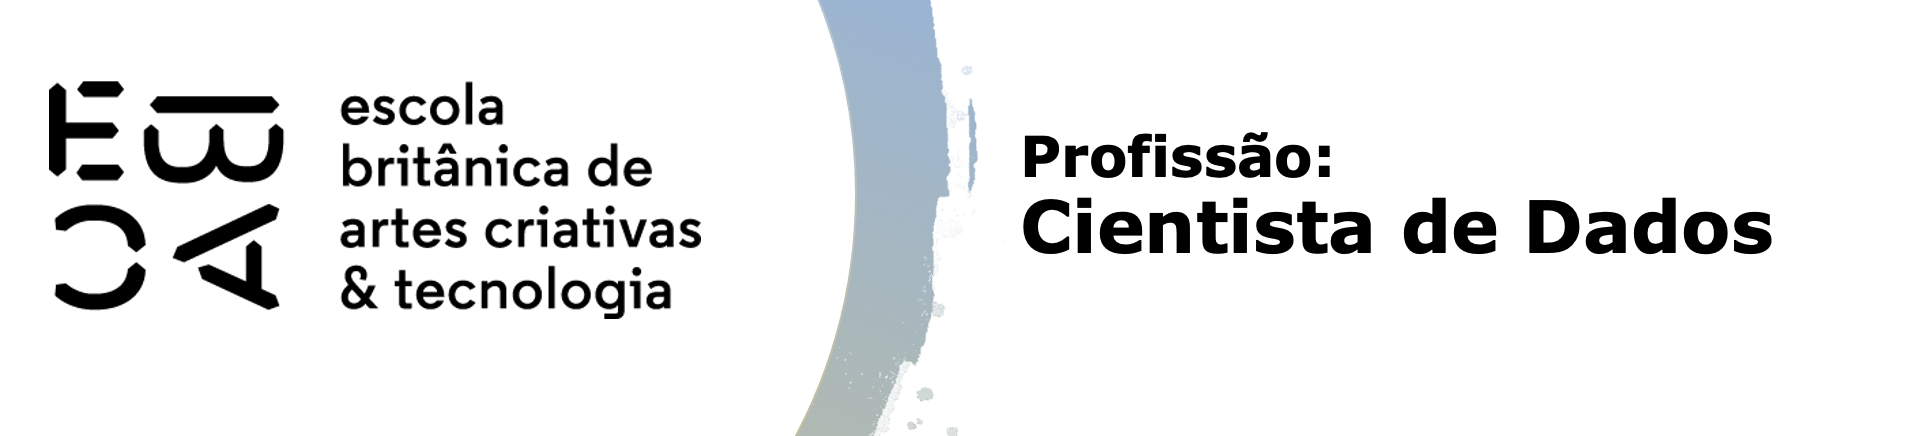

# Inferência

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

## Desgaste de sola de calçado

Vamos estudar o nosso teste de hipóteses com um problema que consiste no estudo de desgaste de dois tipos de solado de calçado.

Um fabricante desenvolveu um solado novo, mais ecológico, mais barato, e confortável. Ele quer comparar os desgastes, e acredita que o solado novo é melhor que o tradicional (oferece menor desgaste).

Para isto fez o seguinte desenho amostral: Selecionou 20 crianças de uma escola de baixa renda, todas dispostas a participar do estudo, as quais ficaram felizes por ganhar o par de calçados do experimento. Como 10 crianças são de uma sala e as outras 10 são de outra sala, separou as crianças em grupos conforme a sala:

- Grupo A: usa o solado de calçado tradicional
- Grupo B: usa o solado de calçado novo

Em seguida orientou a todos que utilizassem exclusivamente o calçado do experimento, acompanhou as crianças por 6 meses, e ao término do período fez uma medida do desgaste em micrômetros. Agora ele deseja comparar o desgaste do solado entre os grupos A e B.

In [4]:
np.random.seed(2360873)

solado_a = 0
solado_b = -15

fator_criança = np.random.normal(100, 30, 20)
efeito_pé = np.random.normal(0, .5, 20)
solado_novo = np.repeat((1, 0), (10, 10))

pé_direito  =  fator_criança + solado_novo*solado_b + efeito_pé
pé_esquerdo =  fator_criança + solado_novo*solado_b - efeito_pé
desenho_1 = pd.DataFrame({'solado':solado_novo, 'pé_direito':pé_direito, 'pé_esquerdo':pé_esquerdo})
desenho_1['Grupo']= desenho_1['solado'].map({0:'Grupo A', 1:'Grupo B'})
desenho_1['desgaste_total']= desenho_1['pé_direito']+desenho_1['pé_esquerdo']


### Os dados
Temos então 20 crianças, as primeiras 10 com o solado novo (Grupo B), as 10 seguintes com o solado tradicional (Grupo A). Temos registrado o desgaste da sola de sapato de cada pé, e um desgaste total que consiste na soma de ambos. O grupo também está registrado na tabela

In [5]:
desenho_1

,solado,pé_direito,pé_esquerdo,Grupo,desgaste_total
0,1,56.307051,56.100425,Grupo B,112.407476
1,1,61.358256,59.659587,Grupo B,121.017843
2,1,106.460879,107.035444,Grupo B,213.496323
3,1,112.279415,113.262668,Grupo B,225.542084
4,1,104.979947,105.812718,Grupo B,210.792665
5,1,41.574875,40.820028,Grupo B,82.394903
6,1,83.099331,83.758882,Grupo B,166.858212
7,1,54.271787,54.491497,Grupo B,108.763284
8,1,9.352026,9.700211,Grupo B,19.052237
9,1,79.355283,80.330801,Grupo B,159.686084


### Análise descritiva

Comparando o desgaste total em ambos os grupos, vemos diferença, mas ainda não podemos dizer se essa diferença é estrapolável para a população geral. 

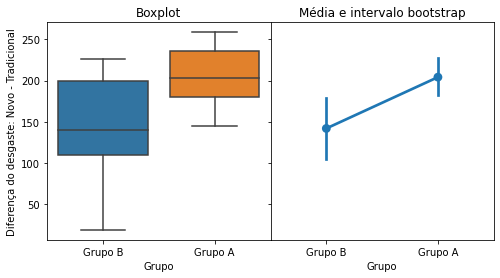

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(8,4), sharey=True)

sns.boxplot(data=desenho_1, y='desgaste_total', x='Grupo', ax=ax[0])
ax[0].set_title('Boxplot')
# ax[0].set_ylim((-4, 0))
# ax[1].set_ylim((-4, 0))
ax[0].set_ylabel('Diferença do desgaste: Novo - Tradicional')

sns.pointplot(data=desenho_1, y='desgaste_total', x='Grupo', ax=ax[1])
ax[1].set_title('Média e intervalo bootstrap')
ax[1].set_ylabel('')

plt.subplots_adjust(wspace=0)

### Fazendo o teste

Como já vimos, o teste-t consiste em calcular a estatistica *t* e compará-la com a distribuição *t* padrão, com *n-1* graus de liberdade. A estatística *t* pode ser calculada pela seguinte fórmula:

$$ t=\frac{\bar{x_1}-\bar{x_2}}{S_{x_1x_2}\sqrt{\frac{2}{n}}} $$

Sendo que:

$$ S_{x_1x_2} = \sqrt{\frac{S_{x_1}^2 +S_{x_2}^2}{2}} $$

A estatística *t*, **sob $H_0$** tem a seguinte distribuição:

$$ t \sim t(n-2) $$

O código abaixo replica a fórmula do teste-t. 

In [7]:
desenho_1.groupby('Grupo')['desgaste_total'].var().mean()**.5

54.094055416877545

In [27]:
desenho_1.groupby('Grupo')['desgaste_total'].var().mean()**.5

54.094055416877545

In [8]:
desvpad = desenho_1.groupby('Grupo')['desgaste_total'].var().mean()**.5
Média_A = desenho_1.groupby('Grupo')['desgaste_total'].mean()['Grupo A']
Média_B = desenho_1.groupby('Grupo')['desgaste_total'].mean()['Grupo B']

diferença = Média_A - Média_B # Numerador da fórmula
erro_padrao = desvpad*((2/10)**.5) # variância amostral*raiz(2/n)
t = diferença/erro_padrao     # Estatística do teste
RC = st.t.ppf(.95, 18)        # Região crítica: sob h0, t está na RC 5% das vezes
p_value=1-st.t.cdf(t, 18)     # p-value: a menor significância para a qual rejeitamos o teste

print(f'diferença: {diferença:.2f}')
print(f'desvio padrão: {desvpad:.2f}')
print(f'erro padrão: {erro_padrao:.2f}')
print(f'estatística do teste: {t:.2f}')
print(f'região crítica: {RC:.2f} ou mais')
print(f'p-value: {p_value:.5f} ou mais')


diferença: 62.15
desvio padrão: 54.09
erro padrão: 24.19
estatística do teste: 2.57
região crítica: 1.73 ou mais
p-value: 0.00966 ou mais


In [28]:
diferença/erro_padrao

2.5690587398444134

### Análise gráfica do teste
O código abaixo faz o gráfico da distribuição da estatística de teste, indica a região crítica, e o valor da estatística do teste. Concluímos com essa análise que há diferença estatística.

A probabilidade para valores entre 1,73 e inf é de 5,00%


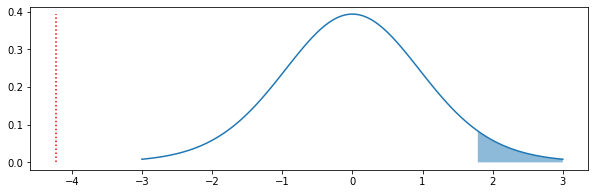

In [29]:
fig, ax = plt.subplots(figsize=(10,3))

# Parâmetros da densidade sob H0
mu = 0
variance = 1
sigma = variance**.5

# Valores de X e Y para plotar a densidade
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = st.t.pdf(x, 18)

# low = início da região crítica do teste
low = st.t.ppf(.95, 18)
high = np.inf

# Gráfico da densidade
ax.plot(x, y)
# Esta linha de referência marca o valor observado da estatística do teste
ax.vlines(x=[t], 
             ymin=0, ymax=y.max(), 
             colors='r', linestyles='dotted')

# área 
plt.fill_between(x, y, where=(low < x) & (x < high), alpha=.5)

# Probabilidade de X pertencer à área
prob_area = st.t.cdf(high, 18) - st.t.cdf(low, 18)
print(f'A probabilidade para valores entre {low:.2f} e {high:.2f} é de {prob_area:.2%}'.replace('.',','))

### Teste-t pelo statsmodels

O Statsmodels implementa uma diversidade enorme de testes e modelos estatísticos. O teste-t como fizemos está implementado, bem como uma diversidade de variações (com amostras desbalanceadas, variâncias diferentes etc).

In [11]:
from statsmodels.stats.weightstats import ttest_ind

x1 = desenho_1.loc[desenho_1['Grupo'] == 'Grupo A', 'desgaste_total']
x2 = desenho_1.loc[desenho_1['Grupo'] == 'Grupo B', 'desgaste_total']

teste_t = ttest_ind(x1, x2, alternative='larger', usevar='pooled', value=0)

teste_t

(2.569058739844414, 0.009656878488419606, 18.0)

In [14]:
print(f'Estatística do teste: {teste_t[0]:.2f}')
print(f'             P-value: {teste_t[1]:.4f}')
print(f'  Graus de liberdade: {teste_t[2]:.2f}')

Estatística do teste: 2.57
             P-value: 0.0097
  Graus de liberdade: 18.00


### Conclusão

A conclusão do pesquisador foi um tanto frustrada pois enquanto acompanhava as salas, reparou que a sala A, que teve maior desgaste, era composta de crianças mais velhas e mais ativas, que praticavam esportes, eram mais pesadas devido à idade e corriam mais. As crianças do grupo B eram mais novas, mais sedentárias e preferiam atividades com menos movimento, o que deve gerar menos desgaste no solado.

O pesquisador ficou com uma dúvida terrível: será que o grupo A apresentou maior desgaste porque as crianças são mais velhas, portanto mais pesadas, além de serem mais ativas ou será que esse resultado é fruto do material superior do solado?

Esse tipo de efeito de múltiplos fatores não separáveis com os dados observados é chamado de **confundimento**.

Como resolver este problema?

-------------

## Desenho amostral alternativo

O fabricante então resolveu chamar um cientista de dados que propôs um desenho novo: cada pé do calçado em um material diferente. Assim, todos os efeitos da criança, biológicos, comportamentais e até de exposição climática seriam "pareados", e a diferença do desgaste seria dada somente pela diferença do tipo de material.

O fabricante dividiu as crianças em grupos aleatoriamente, mas os grupos indicam agora que solado fica em qual pé:

- Grupo A: Solado tradicional no pé esquerdo, e novo no pé direito. 
- Grupo B: Solado tradicional no pé direito, e novo no pé esquerdo. 

Ao final do período, o desgaste foi registrado. O fabricante computou a diferença entre os desgastes do solado Novo menos o desgaste no Tradicional para cada criança, e se essa diferença for predominantemente negativa, significa que o solado novo é melhor.

O código abaixo simula os dados nessa situação. Vamos ver os resultados em seguida:

In [16]:
np.random.seed(2360873)

solado_a = 0
solado_b = -15

fator_criança = np.random.normal(100, 30, 20)
efeito_pé = np.random.normal(0, .5, 20)
solado_novo_dir = np.tile((1, 0), 10)
solado_novo_esq = 1-solado_novo_dir

pé_direito  =  abs(fator_criança + solado_novo_dir*solado_b + efeito_pé)
pé_esquerdo =  abs(fator_criança + solado_novo_esq*solado_b - efeito_pé)
desenho_2 = pd.DataFrame({'solado_novo_dir':solado_novo_dir,
                      'solado_novo_esq':solado_novo_esq, 
                      'pé_direito':pé_direito, 
                      'pé_esquerdo':pé_esquerdo})

### Os dados
Um aspecto chave do desenho 2 é que vamos comparar o desgaste em cada indivíduo variando apenas o material, que é o que queremos estudar. Para isto, vamos avaliar a diferença do desgaste entre o pé direito e o pé esquerdo. 

Agora o grupo é uma mera variável de controle, que indica quem tem o material novo no pé direito ou no pé esquerdo. Não esperamos diferenças por conta disso.

In [17]:
desenho_2['diferença'] = desenho_2['pé_direito']*desenho_2['solado_novo_dir'] -\
                      desenho_2['pé_esquerdo']*desenho_2['solado_novo_dir'] +\
                     desenho_2['pé_esquerdo']*desenho_2['solado_novo_esq']-\
                      desenho_2['pé_direito']*desenho_2['solado_novo_esq']

desenho_2['Grupo']= desenho_2['solado_novo_dir'].map({0:'Grupo A', 1:'Grupo B'})
desenho_2.head()

,solado_novo_dir,solado_novo_esq,pé_direito,pé_esquerdo,diferença,Grupo
0,1,0,56.307051,71.100425,-14.793375,Grupo B
1,0,1,76.358256,59.659587,-16.698669,Grupo A
2,1,0,106.460879,122.035444,-15.574565,Grupo B
3,0,1,127.279415,113.262668,-14.016747,Grupo A
4,1,0,104.979947,120.812718,-15.832770,Grupo B


### Análise descritiva

Podemos até avaliar os desgastes originais na análise descritiva. Mas a análise que vai responder mesmo a nossa pergunta é a avaliação da diferença entre os desgastes do pé direito e do pé esquerdo criança a criança. Como elas usam calçados com materiais diferentes, a principal fonte de variação é o material do calçado.

Repare que o 'importante' neste teste é que os valores sejam diferentes de zero. Por isso 'forçamos' o zero a aparecer no gráfico para realçar a distância das medidas ao zero.

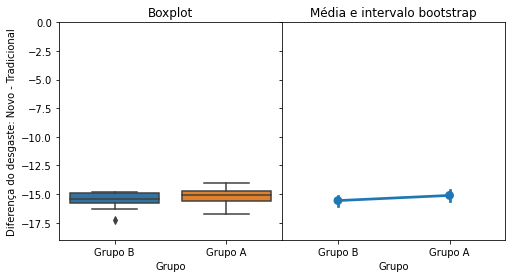

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(8,4), sharey=True)

sns.boxplot(data=desenho_2, y='diferença', x='Grupo', ax=ax[0])
ax[0].set_title('Boxplot')
ax[0].set_ylim((desenho_2['diferença'].min()*1.1, 0))
ax[0].set_ylabel('Diferença do desgaste: Novo - Tradicional')

sns.pointplot(data=desenho_2, y='diferença', x='Grupo', ax=ax[1])
ax[1].set_title('Média e intervalo bootstrap')
ax[1].set_ylabel('')

plt.subplots_adjust(wspace=0)

### Teste-t pareado
Nesse caso, o teste recomendado é o teste-t pareado. Ele tem esse nome porque como avaliamos a diferença entre medidas em um mesmo indivíduo, **pareamos** todos os demais fatores em cada medida, de modo que a diferença só pode se valer à diferença entre materiais (o tratamento que estamos utilizando).

Os dados que utilizamos no teste são as diferenças para cada indivíduo i=1, 2,... n:

$$ D_i = X_{1i}-X_{2i} $$

Em que, no nosso caso, $X_{1i}$ é o desgaste medido no pé esquerdo da criança i, e $X_{2i}$ é o desgaste medido da criança i no pé direito, com $i = 1, 2, ..., n$.

Calculamos então a média dessas diferenças e a variÂncia amostral:

$$ \bar{D} = \sum_{i=1}^n \frac{D_i}{n} $$

$$ S_D = \sum_{i=1}^n \frac {\left(D_i - \bar{D}\right)^2}{n-1} $$

Nesse teste as hipóteses são:<br>
- $H_0$: a média das diferenças é zero<br>
- $H_a$: a média das diferenças é menor que zero

A estatística do teste é:

$$ t = \frac{\bar{X_D}}{S_D\frac{1}{\sqrt{n}}} $$

E, sob $H_0$ a distribuição de $t$ é:
$$ t\sim t(n-1) $$

In [19]:
n=desenho_2.shape[0]
D_barra = desenho_2['diferença'].mean()
Sd = desenho_2['diferença'].std()
ep=Sd/(1/n**.5)

t = D_barra/ep

t

-4.231157247548955

A probabilidade para valores entre -inf e -4,23 é de 0,001162%


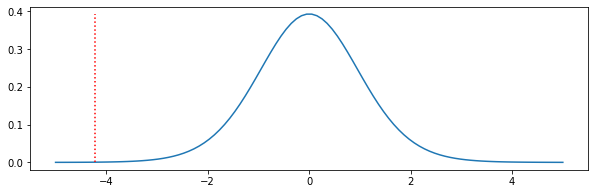

In [20]:
fig, ax = plt.subplots(figsize=(10,3))

mu = 0
variance = 1
sigma = variance**.5
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
y = st.t.pdf(x, 18)
low = -np.inf
high = t

ax.plot(x, y)
ax.vlines(x=[t], 
             ymin=0, ymax=y.max(), 
             colors='r', linestyles='dotted')


plt.fill_between(x, y, where=(low < x) & (x < high), alpha=.5)

prob_area = st.norm.cdf(high, mu, sigma) - st.norm.cdf(low, mu, sigma)
print(f'A probabilidade para valores entre {low:.2f} e {high:.2f} é de {prob_area:.6%}'.replace('.',','))

### Conclusão

Repare que agora não estamos mais comparando os grupos. Idealmente os grupos não devem apresentar diferenças (e não apresentaram). Agora queremos ver se a diferença de desgaste entre os solados é relevante - ou seja, diferente de zero).

Este estudo deixa claro que o solado novo possui menor desgaste que o solado antigo, pois teve desgaste menor para todas as crianças. Esse desgaste é considerado relevante, pois é (em valor absoluto) maior que 10 micrômetros.

### Erro tipo II e Poder do teste

Até agora, tudo o que fizemos foi sobre o erro tipo I, que é a probabilidade de rejeitar $H_0$ dado que $H_0$ é verdadeira.

O erro tipo II é a probabilidade de *não rejeitar* $H_0$ dado que $H_a$ é verdadeira. Nesse caso, para podermos fazer os cálculos, precisamos de uma hipótese nula *pontual*, sobre a qual podemos fazer contas. Resumindo:

- **Erro tipo I**: é a probabilidade de rejeitar $H_0$ quando ela é verdadeira.
- **Erro tipo II**: é a probabilidade de **não** rejeitar $H_0$ quando ela é **falsa** - e quando específicamente $H_a$ é verdadeira.

Denotamos a probabilidade do erro tipo I com a letra grega $\alpha$, da mesma forma, denotamos a probabilidade do erro tipo II com a letra grega $\beta$.

O **poder** do teste é o complementar ao erro tipo II: $1-\beta$, que é a probabilidade de não rejeitarmos $H_0$ quando a hipótese alternativa $H_a$ é verdadeira.

Não é muito comum ver análise de poder de teste, principalmente em modelos de regressão. Mas quando fazemos isso, **na prática** estabelecemos $H_a$ como uma diferença *mínima* considerada *significativa* para o negócio. Não confundir *significante* e *significativa*.

- **Significativa** é uma diferença que tem significado de negócio. Por exemplo, podemos dizer que uma diferença de alturas de 0,1 cm entre pessoas, por mais que possa ter *significância* estatística, não é *significativa* em termos da área de conhecimento ou do negócio.
- **Significante** é uma diferença que aparece relevante em um teste de *significância* estatístico. A significância, no caso, é uma quantidade definida, que é o erro tipo I.

Note que é possível achar diferenças *significantes* e *não significativas* bem como o contrário.

A fórmula *geral* da estatística de teste é a seguinte:


$$ t = \frac{\bar{D}-\mu}{S_D\frac{1}{\sqrt{n}}} $$

E sob cada uma das alternativas, fica assim:

$H_0$: os desgastes são iguais - ou seja $\mu_0 = 0$

$$ t = \frac{\bar{D}-\mu_0}{S_D\frac{1}{\sqrt{n}}} = \frac{\bar{D}}{S_D\frac{1}{\sqrt{n}}}$$

$H_a$: A diferença entre os desgastes é *relevante*, igual a 10 - ou seja $\mu_a = 10$

$$ t = \frac{\bar{D}-\mu_a}{S_D\frac{1}{\sqrt{n}}} = \frac{\bar{D}-10}{S_D\frac{1}{\sqrt{n}}}$$


A probabilidade para valores entre-inf e -1.73 é de 5,000000%


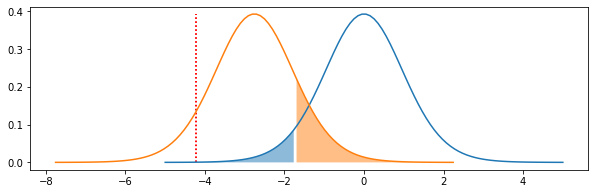

In [66]:
fig, ax = plt.subplots(figsize=(10,3))

mu = 0
variance = 1
sigma = variance**.5

# Densidade da estatística do teste sob H0
x0 = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
y0 = st.t.pdf(x, 18)
low = -np.inf
high = st.t.ppf(.05, n-1)

ax.plot(x0, y0)
ax.vlines(x=[t], 
             ymin=0, ymax=y.max(), 
             colors='r', linestyles='dotted')


plt.fill_between(x0, y0, where=(low < x0) & (x0 < high), alpha=.5)


# Densidade da estatística do teste sob Ha
mua = -10/ep
xa = np.linspace(mua - 5*sigma, mua + 5*sigma, 100)
ya = st.t.pdf(xa-mua, 18)
lowa = high-mua
higha = np.inf

ax.plot(xa, ya)
ax.vlines(x=[t], 
             ymin=0, ymax=y.max(), 
             colors='r', linestyles='dotted')

plt.fill_between(xa, ya, where=(lowa < x0) & (x0 < higha), alpha=.5)

prob_area = st.t.cdf(high, n-1) - st.t.cdf(low, n-1)
print(f'A probabilidade para valores entre{low:.2f} e {high:.2f} '+\
      f'é de {prob_area:.6%}'.replace('.',','))